***DSCI 100 Project proposal***

Natsumi Tadakuma, Jackie Huang, Cindy Chen, Nikko Dumrique

Importing the libraries:

In [8]:
library(tidyverse)
library(tidyr)
library(repr)
library(tidymodels)
library(ggplot2)

In [36]:
options(repr.matrix.max.rows = 6, repr.matrix.max.cols = 64)
options(repr.plot.width = 30, repr.plot.height = 10)

Importing the dataset:

In [20]:
#download the zip file into a temporary file
temp <- tempfile()
temp_dir <- tempfile()
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip", temp, mode="wb")
OnlineNewsPopularity_unzipped <- unzip(temp, exdir = temp_dir)

#read the csv within the unzipped_contents
online_news_pop_csv <- OnlineNewsPopularity_unzipped[2] #may be unzipped_contents[1] if you get an error
online_news_pop_data <- read_csv(online_news_pop_csv)
online_news_pop_data
unlink(c(temp, temp_dir))

Parsed with column specification:
cols(
  .default = col_double(),
  url = col_character()
)

See spec(...) for full column specifications.



url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,⋯,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
http://mashable.com/2013/01/07/amazon-instant-video-browser/,731,12,219,0.6635945,1,0.8153846,4,2,1,⋯,0.10000000,0.7000000,-0.3500000,-0.6000000,-0.2000000,0.5000000,-0.1875000,0.00000000,0.1875000,593
http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/,731,9,255,0.6047431,1,0.7919463,3,1,1,⋯,0.03333333,0.7000000,-0.1187500,-0.1250000,-0.1000000,0.0000000,0.0000000,0.50000000,0.0000000,711
http://mashable.com/2013/01/07/apple-40-billion-app-downloads/,731,9,211,0.5751295,1,0.6638655,3,1,1,⋯,0.10000000,1.0000000,-0.4666667,-0.8000000,-0.1333333,0.0000000,0.0000000,0.50000000,0.0000000,1500
http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/,731,9,531,0.5037879,1,0.6656347,9,0,1,⋯,0.13636364,0.8000000,-0.3696970,-0.6000000,-0.1666667,0.0000000,0.0000000,0.50000000,0.0000000,1200
http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.4156456,1,0.5408895,19,19,20,⋯,0.03333333,1.0000000,-0.2201923,-0.5000000,-0.0500000,0.4545455,0.1363636,0.04545455,0.1363636,505
http://mashable.com/2013/01/07/beewi-smart-toys/,731,10,370,0.5598886,1,0.6981982,2,2,0,⋯,0.13636364,0.6000000,-0.1950000,-0.4000000,-0.1000000,0.6428571,0.2142857,0.14285714,0.2142857,855
http://mashable.com/2013/01/07/bodymedia-armbandgets-update/,731,8,960,0.4181626,1,0.5498339,21,20,20,⋯,0.10000000,1.0000000,-0.2244792,-0.5000000,-0.0500000,0.0000000,0.0000000,0.50000000,0.0000000,556
http://mashable.com/2013/01/07/canon-poweshot-n/,731,12,989,0.4335736,1,0.5721078,20,20,20,⋯,0.10000000,1.0000000,-0.2427778,-0.5000000,-0.0500000,1.0000000,0.5000000,0.50000000,0.5000000,891
http://mashable.com/2013/01/07/car-of-the-future-infographic/,731,11,97,0.6701031,1,0.8367347,2,0,0,⋯,0.40000000,0.8000000,-0.1250000,-0.1250000,-0.1250000,0.1250000,0.0000000,0.37500000,0.0000000,3600


tidying the data:

In [24]:
news = online_news_pop_data %>% 
      mutate(popularity = ifelse(shares < 500, "Not_Popular",
                          ifelse(shares %in% 500:1399, "Somewhat_Popular",
                          ifelse(shares %in% 1400:3299, "Popular", "Viral")))) %>% 
      mutate(popularity = as_factor(popularity))


In [25]:
# combining the weekdays and data channels into one column
# which(colnames(news)=="data_channel_is_lifestyle")

news[,14:19][news[,14:19] == 0] = NA

news = news %>% 
    pivot_longer(data_channel_is_lifestyle:data_channel_is_world,
                 names_to = "Channel",
                 names_prefix = "data_channel_is_",
                 values_to = "Value",
                 values_drop_na = TRUE) %>% 
  select(-Value)

# which(colnames(news)=="weekday_is_monday")
news[,32:38][news[32:38] == 0] = NA
news = news %>% 
    pivot_longer(weekday_is_monday:weekday_is_sunday,
                 names_to = "weekday",
                 names_prefix = "weekday_is_",
                 values_to = "value",
                 values_drop_na = TRUE) %>% 
  select(-value)

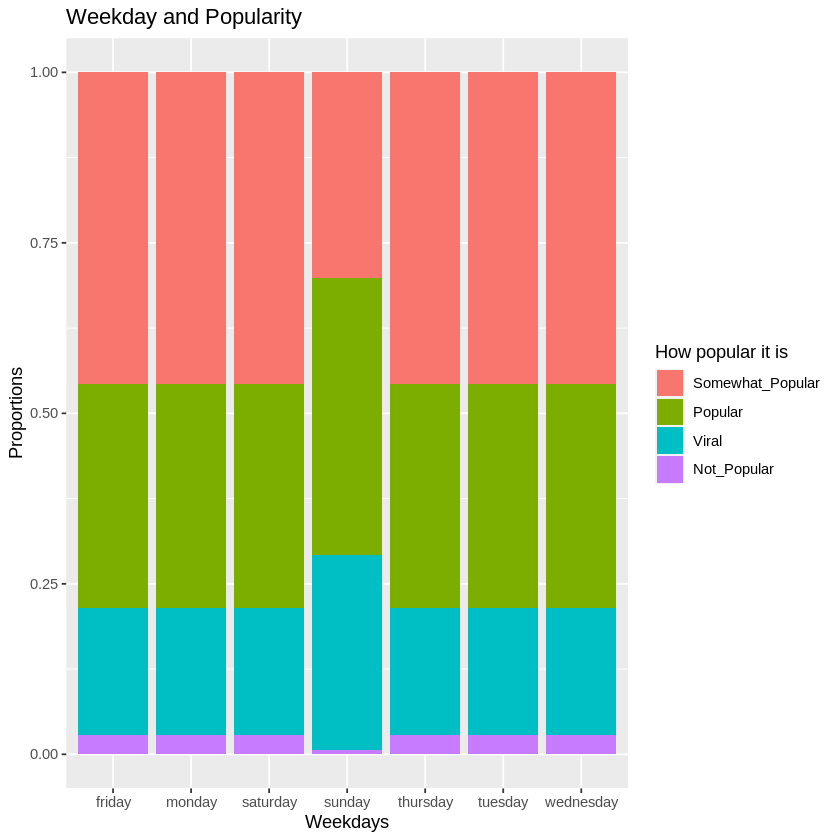

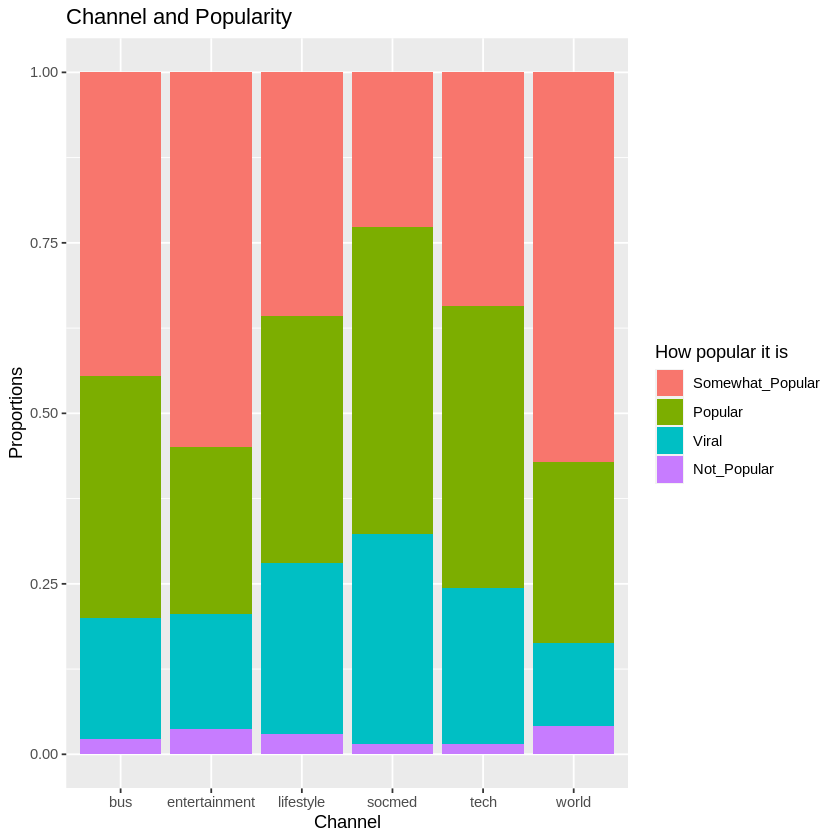

In [26]:
#plots
pltWeekdays = news %>% 
            ggplot(aes(x = weekday, fill = popularity)) +
            geom_bar(position = "fill") + 
            labs( x = "Weekdays", y = "Proportions", fill = "How popular it is", 
                  title = "Weekday and Popularity")
pltWeekdays

pltChannels = news %>% 
            ggplot(aes(x = Channel, fill = popularity)) +
            geom_bar(position = "fill") + 
            labs( x = "Channel", y = "Proportions", fill = "How popular it is", 
                  title = "Channel and Popularity")
pltChannels


In [41]:

pltWkCh = news %>% 
#         filter(shares < 500) %>% 
        ggplot(aes(x = popularity, y = shares)) +
        facet_grid(. ~popularity, scales = "free_y") +
        geom_point(aes(color = weekday, shape = Channel), size = 1.5) +
        labs(x = "Popularity", y = "Shares", color = "What day of it is",
             shape = "Type of chanel") +
  theme(text = element_text(size = 18))
pltWkCh

# pltWkCh2 = news %>%
#         filter(shares < 3300) %>% 
#         ggplot(aes(x = popularity, y = shares)) +
#         geom_point(aes(color = weekday, shape = Channel), size = 1.5) +
#         labs(x = "Popularity", y = "Shares", color = "What day of it is",
#              shape = "Type of chanel")
# pltWkCh2

ERROR: Error in match.arg(scales, c("fixed", "free_x", "free_y", "free")): 'arg' should be one of “fixed”, “free_x”, “free_y”, “free”
